In [77]:
#Import neessary programs
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
#File to load
file = "los-angeles-parking-citations/parking-citations.csv"

In [79]:
#Load CSV
data = pd.read_csv(file, delimiter=",", dtype={'Ticket Number':str,'VIN':str,0:str},nrows=10000)
parkingdf = pd.DataFrame(data)
parkingdf.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [80]:
#Minor cleaning
parkingdf = parkingdf.drop(labels = ['Ticket number', 'Meter Id', 'Marked Time', 'Plate Expiry Date', 'VIN', 'Route', 'Agency'], axis=1)
parkingdf = parkingdf.replace(to_replace='nan',value=np.nan)
parkingdf = parkingdf.dropna()
parkingdf.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,8939,WHITE CURB,58.0,6439997.9,1802686.4
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0
5,2015-09-15T00:00:00,19.0,CA,CHEV,VN,GY,SAN PEDRO S/O BOYD,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0


In [81]:
#Look at car make values
parkingdf['Make'].value_counts().head(15)

TOYT    1621
HOND    1165
FORD     885
NISS     704
CHEV     700
BMW      432
VOLK     359
MERZ     350
DODG     314
HYUN     303
LEXS     257
KIA      213
JEEP     186
GMC      174
AUDI     171
Name: Make, dtype: int64

In [82]:
#Merge duplicate values
parkingdf = parkingdf.replace('TOYO', 'TOYT')
parkingdf['Make'].value_counts()

TOYT    1791
HOND    1165
FORD     885
NISS     704
CHEV     700
BMW      432
VOLK     359
MERZ     350
DODG     314
HYUN     303
LEXS     257
KIA      213
JEEP     186
GMC      174
AUDI     171
MAZD     169
OTHR     158
INFI     145
CHRY     136
ACUR     127
SUBA     104
MITS     101
VOLV      93
CADI      65
MNNI      62
FRHT      60
LINC      52
BUIC      51
GRUM      51
UNK       48
        ... 
SMRT       6
LROV       5
SATU       5
HNO        4
GEO        4
MINI       4
JAGR       3
YAMA       3
SUZU       3
HD         3
MACK       3
BENT       2
FREI       2
KAWK       2
FRTL       2
FERR       1
SCIO       1
ESTB       1
LIND       1
DATS       1
TRIU       1
TESL       1
ISUZ       1
EXPL       1
CHEC       1
ROL        1
DAEW       1
JENS       1
ACC        1
HINO       1
Name: Make, Length: 82, dtype: int64

In [83]:
#Create new variable to hold new values
make_counts = parkingdf["Make"].value_counts()
make_counts

TOYT    1791
HOND    1165
FORD     885
NISS     704
CHEV     700
BMW      432
VOLK     359
MERZ     350
DODG     314
HYUN     303
LEXS     257
KIA      213
JEEP     186
GMC      174
AUDI     171
MAZD     169
OTHR     158
INFI     145
CHRY     136
ACUR     127
SUBA     104
MITS     101
VOLV      93
CADI      65
MNNI      62
FRHT      60
LINC      52
BUIC      51
GRUM      51
UNK       48
        ... 
SMRT       6
LROV       5
SATU       5
HNO        4
GEO        4
MINI       4
JAGR       3
YAMA       3
SUZU       3
HD         3
MACK       3
BENT       2
FREI       2
KAWK       2
FRTL       2
FERR       1
SCIO       1
ESTB       1
LIND       1
DATS       1
TRIU       1
TESL       1
ISUZ       1
EXPL       1
CHEC       1
ROL        1
DAEW       1
JENS       1
ACC        1
HINO       1
Name: Make, Length: 82, dtype: int64

In [84]:
#Create new dataframe
car_make_df = pd.DataFrame(make_counts).head(10)
car_make_df

,Make
TOYT,1791
HOND,1165
FORD,885
NISS,704
CHEV,700
BMW,432
VOLK,359
MERZ,350
DODG,314
HYUN,303


In [85]:
#Rename column
car_make_df = car_make_df.rename(columns = {"Make" : "Citations"})
car_make_df

,Citations
TOYT,1791
HOND,1165
FORD,885
NISS,704
CHEV,700
BMW,432
VOLK,359
MERZ,350
DODG,314
HYUN,303


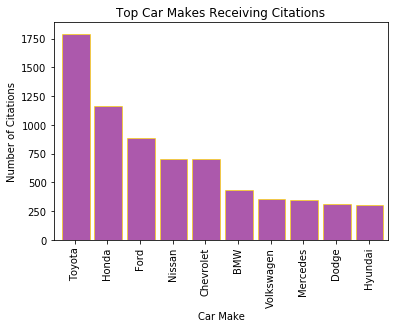

In [86]:
#Create bar chart
x_axis = np.arange(0, len(top_car_makes))
tick_locations = [value+0.4 for value in x_axis]

plt.title("Top Car Makes Receiving Citations")
plt.xlabel("Car Make")
plt.ylabel("Number of Citations")

plt.xlim(-.25, len(top_car_makes) - 0)
plt.ylim(0, max(top_car_makes['Citations']) + 100)

plt.xticks(tick_locations, ('Toyota', 'Honda', 'Ford', 'Nissan', 'Chevrolet', 'BMW', 'Volkswagen', 'Mercedes', 'Dodge', 'Hyundai'), rotation = "vertical")
plt.bar(x_axis, top_car_makes['Citations'], width=.85, facecolor="purple", edgecolor="gold", alpha=0.65, align="edge")
plt.show()

In [88]:
#Save figure
plt.savefig("Output/CarMakesViolations.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Output/CarMakesViolations.png'

<Figure size 432x288 with 0 Axes>

In [51]:
parkingdf['Body Style'].value_counts()

PA    8736
PU     339
TK     275
VN     273
CM     166
TR      86
SU      30
MH      18
MC      17
OT       8
UT       1
RV       1
HS       1
VV       1
Name: Body Style, dtype: int64

In [89]:
parkingdf = parkingdf.replace('TR', 'TK')
parkingdf = parkingdf.replace('VV', 'OT')
parkingdf = parkingdf.replace('UT', 'OT')
parkingdf = parkingdf.replace('HS', 'OT')
parkingdf['Body Style'].value_counts()

PA    8736
TK     361
PU     339
VN     273
CM     166
SU      30
MH      18
MC      17
OT      11
RV       1
Name: Body Style, dtype: int64

In [90]:
body_counts = parkingdf['Body Style'].value_counts()
body_counts

PA    8736
TK     361
PU     339
VN     273
CM     166
SU      30
MH      18
MC      17
OT      11
RV       1
Name: Body Style, dtype: int64

In [91]:
car_body_df = pd.DataFrame(body_counts).head(10)
car_body_df

,Body Style
PA,8736
TK,361
PU,339
VN,273
CM,166
SU,30
MH,18
MC,17
OT,11
RV,1


In [92]:
car_body_df = car_body_df.rename(columns = {'Body Style' : 'Citations'})
car_body_df

,Citations
PA,8736
TK,361
PU,339
VN,273
CM,166
SU,30
MH,18
MC,17
OT,11
RV,1


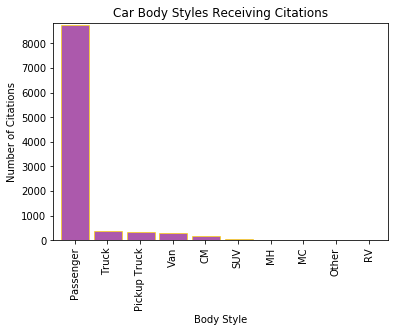

In [93]:
x_axis = np.arange(0, len(car_body_df))
tick_locations = [value+0.4 for value in x_axis]

plt.title("Car Body Styles Receiving Citations")
plt.xlabel("Body Style")
plt.ylabel("Number of Citations")

plt.xlim(-.25, len(car_body_df) - 0)
plt.ylim(0, max(car_body_df['Citations']) + 100)

plt.xticks(tick_locations, ('Passenger', 'Truck', 'Pickup Truck', 'Van', 'CM', 'SUV', 'MH', 'MC', 'Other', 'RV'), rotation = "vertical")
plt.bar(x_axis, car_body_df['Citations'], width=.85, facecolor="purple", edgecolor="gold", alpha=0.65, align="edge")
plt.show()

In [94]:
plt.savefig("Output/CarBodyStyleViolations.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Output/CarBodyStyleViolations.png'

<Figure size 432x288 with 0 Axes>

In [95]:
parkingdf["Color"].value_counts().head(15)

BK    2048
WT    1979
GY    1920
SL    1276
BL     716
RD     484
GN     302
WH     194
BN     193
GO     162
MR     133
SI     130
TN      71
OT      57
BG      56
Name: Color, dtype: int64

In [96]:
parkingdf = parkingdf.replace('WH', 'WT')
parkingdf = parkingdf.replace('SI', 'SL')
parkingdf["Color"].value_counts()

WT    2173
BK    2048
GY    1920
SL    1406
BL     716
RD     484
GN     302
BN     193
GO     162
MR     133
TN      71
OT      57
BG      56
RE      53
GR      35
YE      29
OR      28
TA      20
PR      19
MA      13
BR      10
UN       7
CO       5
TU       5
BE       5
BU       1
PK       1
Name: Color, dtype: int64

In [97]:
color_counts = parkingdf['Color'].value_counts()
color_counts

WT    2173
BK    2048
GY    1920
SL    1406
BL     716
RD     484
GN     302
BN     193
GO     162
MR     133
TN      71
OT      57
BG      56
RE      53
GR      35
YE      29
OR      28
TA      20
PR      19
MA      13
BR      10
UN       7
CO       5
TU       5
BE       5
BU       1
PK       1
Name: Color, dtype: int64

In [98]:
car_color_df = pd.DataFrame(color_counts).head(10)
car_color_df.head(10)

,Color
WT,2173
BK,2048
GY,1920
SL,1406
BL,716
RD,484
GN,302
BN,193
GO,162
MR,133


In [99]:
car_color_df = car_color_df.rename(columns = {'Color' : 'Citations'})
car_color_df

,Citations
WT,2173
BK,2048
GY,1920
SL,1406
BL,716
RD,484
GN,302
BN,193
GO,162
MR,133


In [100]:
#top_car_colors = car_color_df.loc[car_color_df['Citations'] >= 100]
#top_car_colors

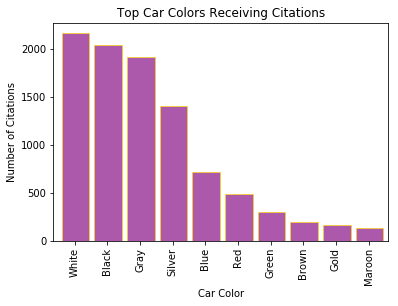

In [101]:
x_axis = np.arange(0, len(top_car_colors))
tick_locations = [value+0.4 for value in x_axis]

plt.title("Top Car Colors Receiving Citations")
plt.xlabel("Car Color")
plt.ylabel("Number of Citations")

plt.xlim(-.25, len(top_car_colors) - 0)
plt.ylim(0, max(top_car_colors['Citations']) + 100)

plt.xticks(tick_locations, ('White', 'Black', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Brown', 'Gold', 'Maroon'), rotation = "vertical")
plt.bar(x_axis, top_car_colors['Citations'], width=.85, facecolor= "purple", edgecolor="gold", alpha=0.65, align="edge")
plt.show()

In [102]:
plt.savefig("Output/CarColorViolations.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Output/CarColorViolations.png'

<Figure size 432x288 with 0 Axes>

In [57]:
parkingdf['Fine amount'].mean()

72.02944131832797